# CNN: Image classification

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# Dropout Regularization: To get rid of overfitting problem
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import backend as k

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Number of classes - do not change unless the data changes
num_classes = 10

In [2]:
# sizes of batch and # of epochs of data
batch_size = 64
epochs = 24

In [3]:
# input image dimensions
img_rows, img_cols = 28,28

In [6]:
# the data shuffled and split between train and test sets
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using Colab cache for faster access to the 'fashionmnist' dataset.
Path to dataset files: /kaggle/input/fashionmnist
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
len(y_train)

60000

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
x_train.shape[0]

60000

In [13]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [14]:
input_shape

(28, 28, 1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
# Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print('x_train shape:' , x_train.shape)
print('x_test shape: ', x_test.shape)
print(y_train[0:3])

x_train shape: (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
[9 0 0]


In [26]:
# convert class vectors to binary class matrices. one hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:3]) # verify one-hot encoding

[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0

#CNN code

In [18]:
# Define the model
model = Sequential()

In [19]:
num_classes

10

In [20]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size= (3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# define compile to minimize categorical loss, use ada delta optimized, and optimise to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
# Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
# Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.7146 - loss: 0.7704 - val_accuracy: 0.8554 - val_loss: 0.3977
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.8713 - loss: 0.3543 - val_accuracy: 0.8757 - val_loss: 0.3320
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.8910 - loss: 0.3006 - val_accuracy: 0.8913 - val_loss: 0.2999
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8989 - loss: 0.2681 - val_accuracy: 0.8938 - val_loss: 0.2916
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9059 - loss: 0.2501 - val_accuracy: 0.8951 - val_loss: 0.2871
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9170 - loss: 0.2225 - val_accuracy: 0.8972 - val_loss: 0.2692
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9237 - loss: 0.2054 - val_accuracy: 0.9003 - val_loss: 0.2712
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9310 - loss: 0.1881 - 

In [22]:
hist.history

{'accuracy': [0.8003833293914795,
  0.875166654586792,
  0.8913666605949402,
  0.9007333517074585,
  0.9081666469573975,
  0.9156500101089478,
  0.9235333204269409,
  0.9285500049591064,
  0.9340999722480774,
  0.9381499886512756,
  0.9417499899864197,
  0.9462666511535645,
  0.9489499926567078,
  0.953000009059906,
  0.9572499990463257,
  0.9596166610717773,
  0.9638500213623047,
  0.9661166667938232,
  0.9693833589553833,
  0.9713666439056396,
  0.9730666875839233,
  0.9764999747276306,
  0.9771333336830139,
  0.9769499897956848],
 'loss': [0.5389412641525269,
  0.3434377610683441,
  0.2955703139305115,
  0.2661523222923279,
  0.24533741176128387,
  0.22454103827476501,
  0.20749790966510773,
  0.1918455958366394,
  0.17658965289592743,
  0.16342812776565552,
  0.15338000655174255,
  0.14298786222934723,
  0.13385695219039917,
  0.12478043884038925,
  0.11305656284093857,
  0.10666275769472122,
  0.09652828425168991,
  0.08971811830997467,
  0.0832514837384224,
  0.0764559954404831,


Test loss: 0.44316840171813965
Test accuracy: 0.9089000225067139


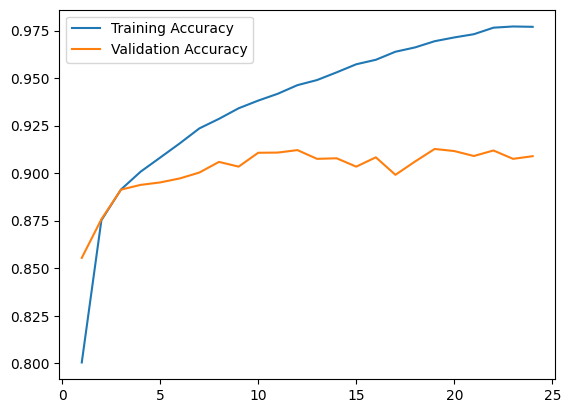

In [24]:
from requests.exceptions import InvalidJSONError
# Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy'])+1)) # values for x axis [1,2,3,...., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)